In [325]:
import sys, re
from scipy.optimize.optimize import fmin_cg, fmin_bfgs, fmin
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt, where,zeros,e, array, log, ones, mean, where
from pylab import scatter, show, legend, xlabel, ylabel, plot
from scipy.optimize import fmin_bfgs
import math 


In [323]:
def sigmoid(z):
   g=1/(1+np.exp(-z))
   return g


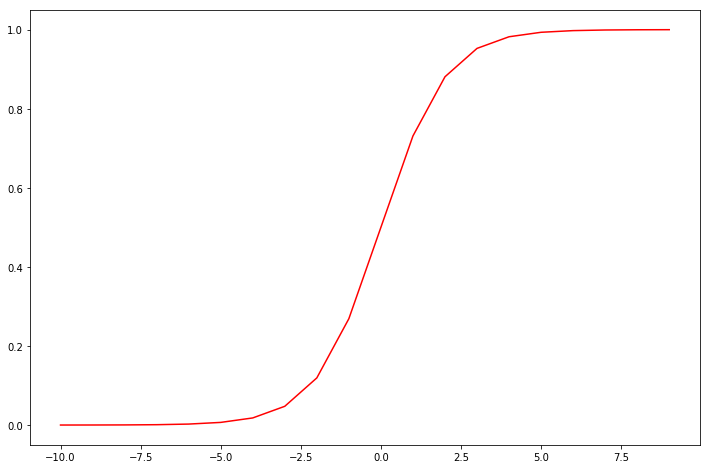

In [324]:
#checking for the functioning of sigmoid function
nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(nums, sigmoid(nums), 'r') 
plt.show()


In [316]:
def costFunction(theta,X,y):
   theta.shape = (1, 3)
   m = y.size
   h = sigmoid(X.dot(theta.conj().transpose()))
   first = ((-y).T.dot(log(h)))
   second = (1-y).T.dot(log(1-h))
   J =(first - second)/m
   return J.sum()

In [317]:
def gradFunction(theta,X,y):
   theta.shape = (1, 3)
   grad = zeros(3)
   h = sigmoid(X.dot(theta.conj().transpose()))
   delta = h - y
   l = grad.size
   for i in range(l):
      sumdelta = delta.conj().transpose().dot(X[:, i])
      grad[i] = (1.0 / m) * sumdelta * (-1)
   theta.shape = (3,)
   return grad

In [318]:

data = loadtxt('ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y =  data[:, 2]
pos = where(y == 1)
neg = where(y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('X')
ylabel('Y')
legend(['X', 'Y'])

m, n = X.shape
y.shape = (m, 1)
i = ones(shape=(m, 3))
i[:, 1:3] = X


In [319]:
def learning_parameters(i, y):
    def f(theta):
        return costFunction(theta, i, y)

    def fprime(theta):
        return gradFunction(theta, i, y)
    theta = zeros(3)
    return fmin_bfgs(f, theta, fprime, disp=True, maxiter=400)


/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/Library/Python/2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


         Current function value: nan
         Iterations: 1
         Function evaluations: 42
         Gradient evaluations: 42


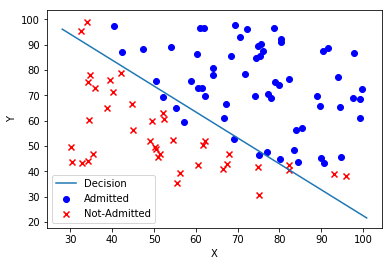

In [320]:
learning_parameters(i, y)
theta = [-25.161272, 0.206233, 0.201470]

plot_x = array([min(i[:, 1]) - 2, max(i[:, 2]) + 2])
plot_y = (-1/theta[2]) * (theta[1] * plot_x + theta[0])

plot(plot_x, plot_y)
legend(['Decision', 'Admitted', 'Not-Admitted'])
show()


In [321]:
prob = sigmoid(array([1.0, 45.0, 85.0]).dot(array(theta).conj().transpose()))
print 'Probability: %f' % prob

Probability: 0.776288


In [322]:
def predict(theta,X):
   m, n = X.shape
   p = zeros(shape=(m, 1))
   h = sigmoid(X.dot(theta.conj().transpose()))

   for i in range(0, h.shape[0]):
        if h[i] > 0.5:
            p[i, 0] = 1
        else:
            p[i, 0] = 0
   return p

p = predict(array(theta), i)
print "Train Accuracy:",((y[where(p == y)].size / float(y.size)) * 100.0)

Train Accuracy: 89.0
